In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

**Dataset:** https://absentdata.com/data-analysis/where-to-find-data/

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe(include="all")

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


# Univariate Analysis

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

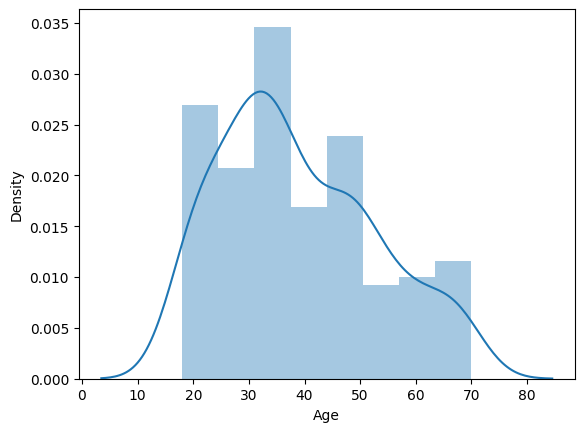

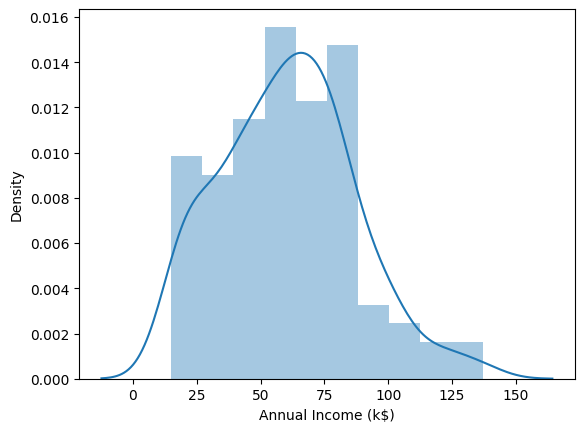

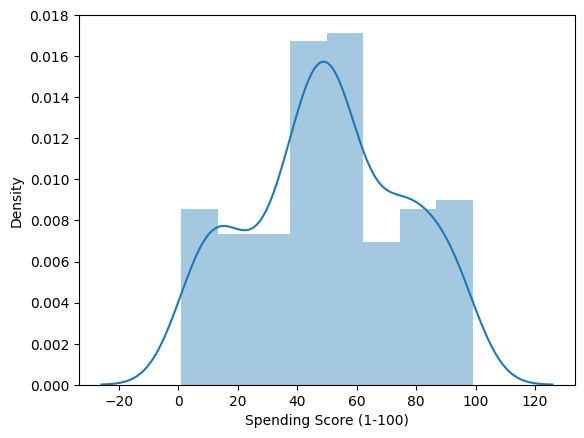

In [7]:
list1 = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in list1:
    plt.figure()
    sns.distplot(df[i])

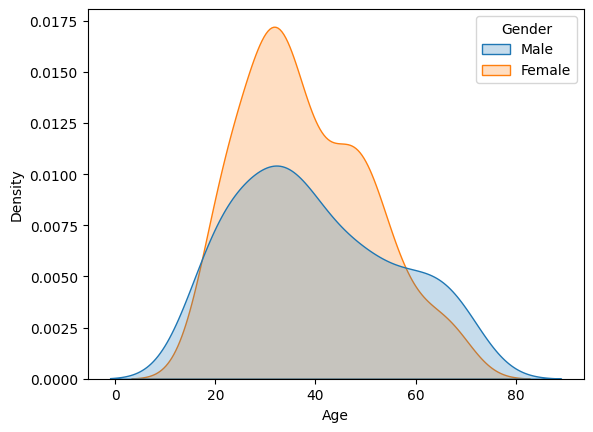

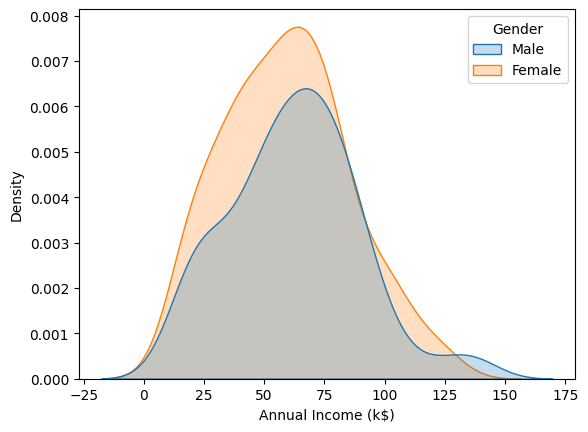

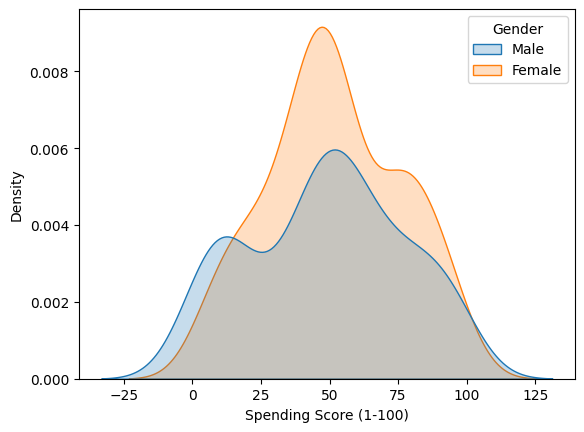

In [8]:
for i in list1:
    plt.figure()
    sns.kdeplot(x = df[i],fill=True,hue=df["Gender"])

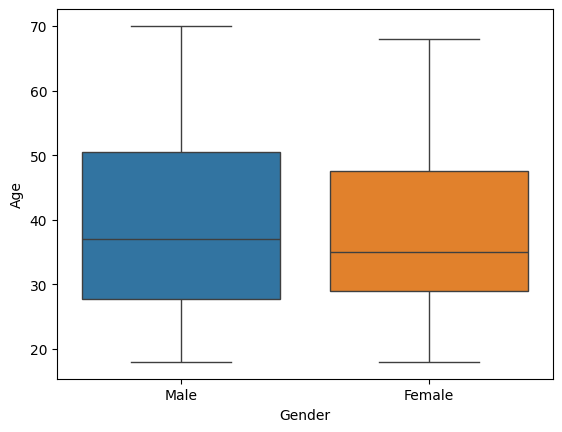

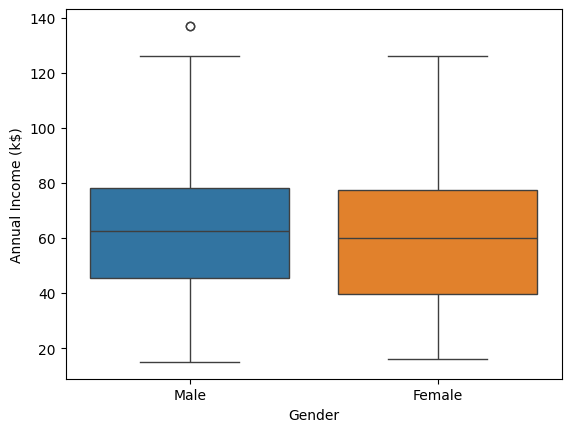

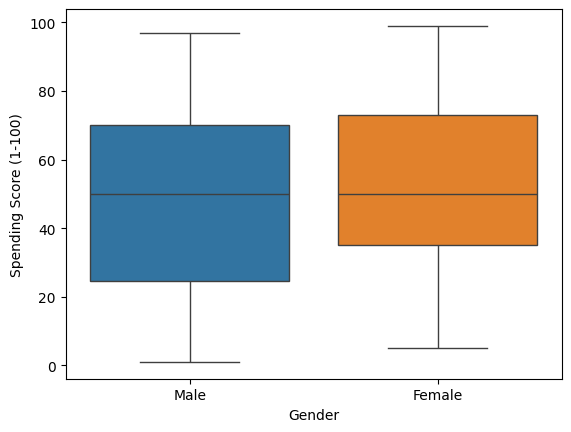

In [9]:
for i in list1:
    plt.figure()
    sns.boxplot(x=df["Gender"],y=df[i],hue=df["Gender"])

In [10]:
df["Gender"].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [11]:
df["Gender"].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# Bivariate Analysis

In [12]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

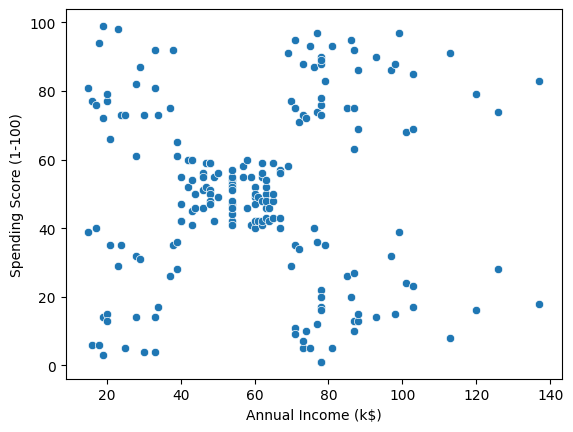

In [13]:
sns.scatterplot(data=df,x="Annual Income (k$)",y="Spending Score (1-100)");

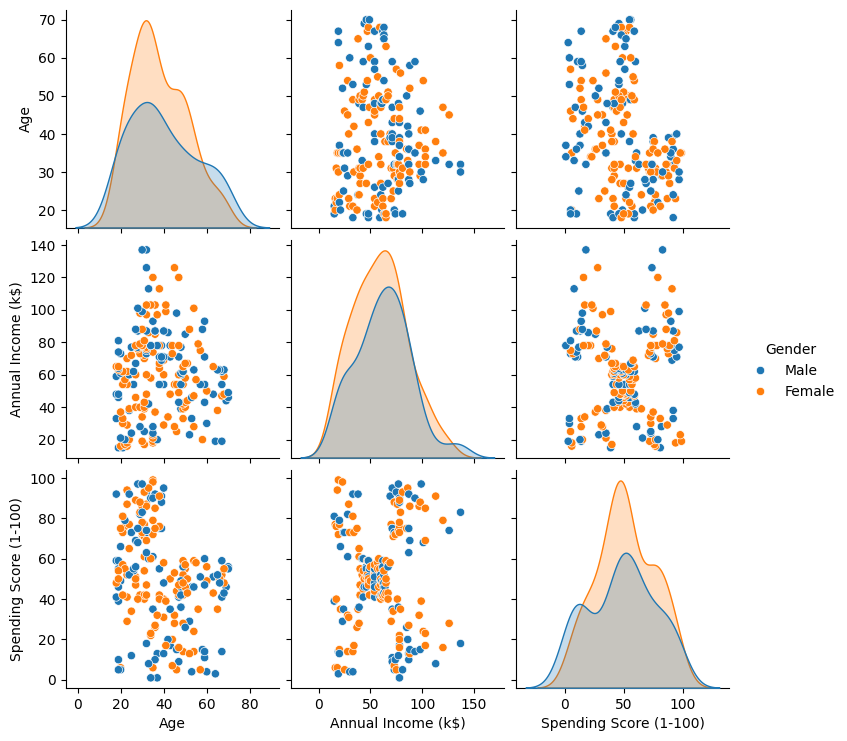

In [14]:
df = df.drop(columns=["CustomerID"])
sns.pairplot(df,hue="Gender");

In [15]:
df.groupby("Gender")[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [16]:
df.corr(numeric_only=True)

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


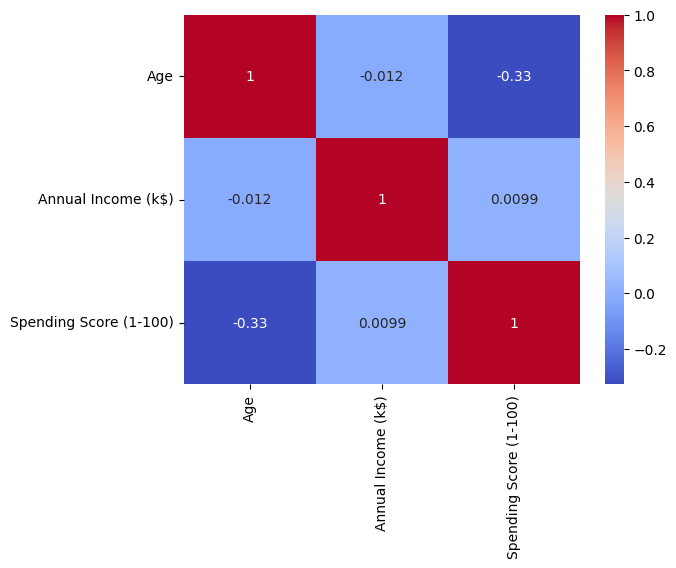

In [17]:
sns.heatmap(df.corr(numeric_only=True),cmap="coolwarm",annot=True);

# Clustering - Univariate

In [18]:
clustering1 = KMeans(n_clusters=3) #Calling the algo then fitting data

In [19]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [20]:
clustering1.fit(df[['Annual Income (k$)']]) #pass it as a df not a series of one col

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [21]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [22]:
df["Income Cluster"] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [23]:
df["Income Cluster"].value_counts()

Income Cluster
2    92
0    86
1    22
Name: count, dtype: int64

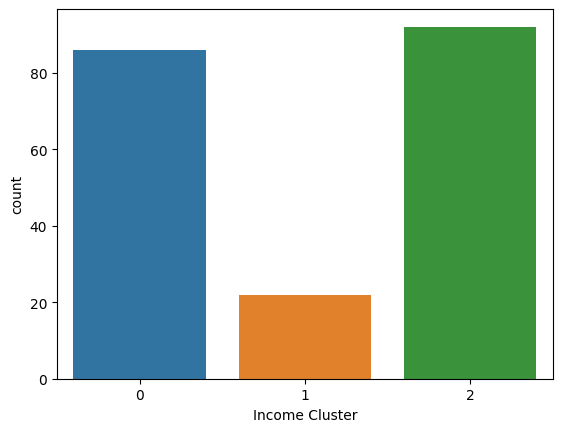

In [24]:
sns.countplot(x = df["Income Cluster"], palette="tab10");

## Elbow method to determine the ideal no. of clusters 

In [25]:
clustering1.inertia_ #this gives us a score for different no. of clusters (distance b/w centroids)

25341.285871863227

In [26]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [27]:
inertia_score = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_score.append(kmeans.inertia_)
inertia_score

[137277.28,
 49761.73701298701,
 25640.457784396836,
 14647.235170393065,
 8688.38897787948,
 7535.372566030461,
 4035.6746031746034,
 2822.4996947496948,
 2548.997252747253,
 2011.292207792208]

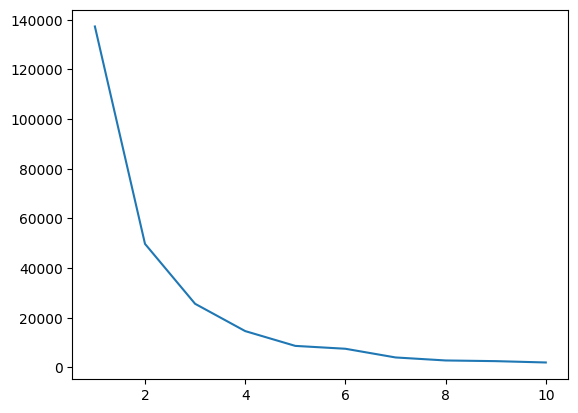

In [28]:
plt.plot(range(1,11),inertia_score); # 3 clusters here can be ideal

In [29]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [30]:
df.groupby("Income Cluster")[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,40.023256,36.348837,50.081395
1,37.545455,108.181818,52.000000
2,38.065217,71.804348,49.880435


# Clustering - Bivariate

In [99]:
clustering2 = KMeans(n_clusters=5)

In [100]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Income-Spending Cluster'],
      dtype='object')

In [101]:
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
clustering2.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [102]:
df["Income-Spending Cluster"] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income-Spending Cluster
0,Male,19,15,39,0,4
1,Male,21,15,81,0,3
2,Female,20,16,6,0,4
3,Female,23,16,77,0,3
4,Female,31,17,40,0,4


In [103]:
df["Income-Spending Cluster"].value_counts()

Income-Spending Cluster
0    81
2    39
1    35
4    23
3    22
Name: count, dtype: int64

In [104]:
df["Income-Spending Cluster"].value_counts(normalize=True)*100

Income-Spending Cluster
0    40.5
2    19.5
1    17.5
4    11.5
3    11.0
Name: proportion, dtype: float64

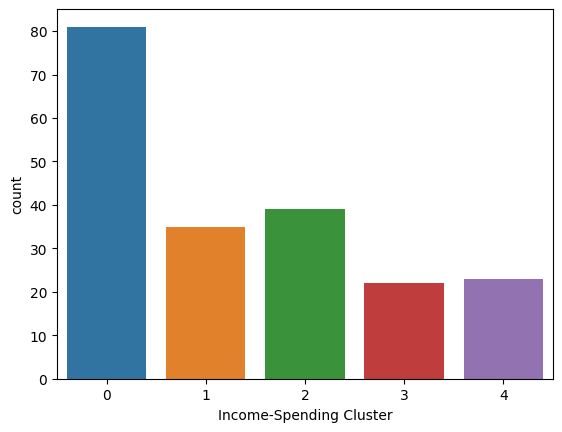

In [105]:
sns.countplot(x=df["Income-Spending Cluster"],palette="tab10");

## Elbow method to determine the ideal no. of clusters 

In [106]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Income-Spending Cluster'],
      dtype='object')

In [107]:
inertia_score1 = []
for i in range(1,11):
    kmeans1 = KMeans(n_clusters=i)
    kmeans1.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_score1.append(kmeans1.inertia_)
inertia_score1

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73880.64496247194,
 44448.45544793371,
 37558.92202302528,
 32277.023173884932,
 26644.73007546732,
 21850.165282585633,
 20119.317172897783]

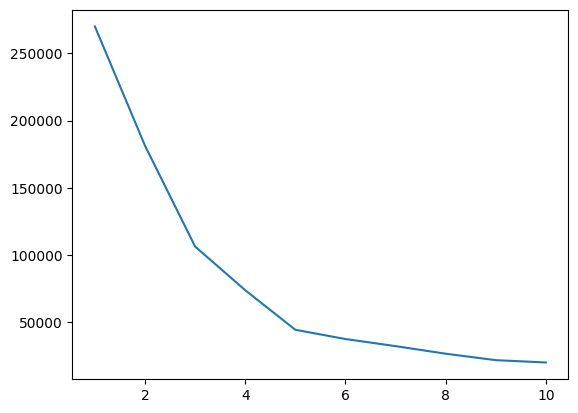

In [108]:
plt.plot(range(1,11),inertia_score1); # 5 clusters are optimum

In [109]:
df.groupby("Income-Spending Cluster")[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income-Spending Cluster,,,
0,42.716049,55.296296,49.518519
1,41.114286,88.200000,17.114286
2,32.692308,86.538462,82.128205
3,25.272727,25.727273,79.363636
4,45.217391,26.304348,20.913043


In [110]:
clustering2.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [111]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']
centers

,x,y
0,55.296296,49.518519
1,88.200000,17.114286
2,86.538462,82.128205
3,25.727273,79.363636
4,26.304348,20.913043


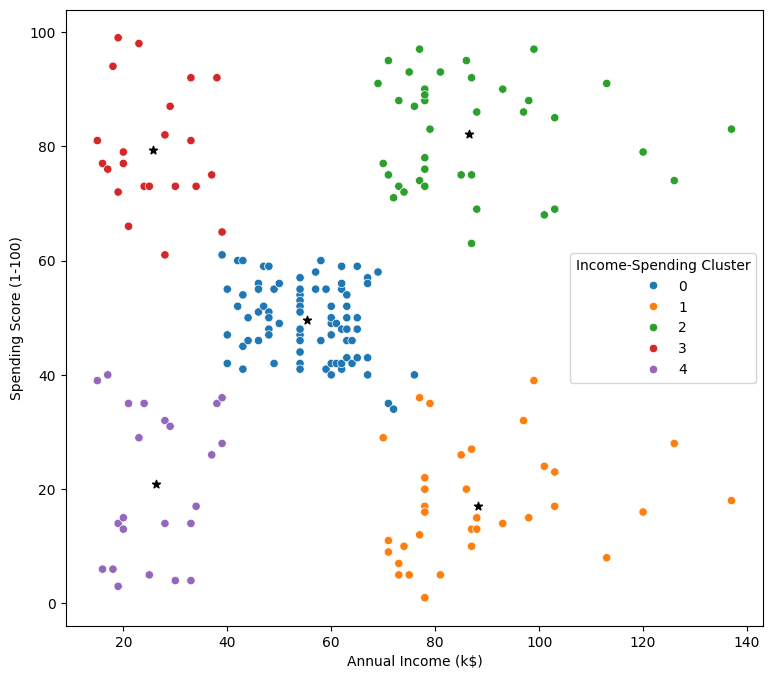

In [112]:
plt.figure(figsize=(9,8))
plt.scatter(x=centers['x'],y=centers['y'],c='black',marker='*')
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue="Income-Spending Cluster",palette="tab10");
plt.savefig("clustering_bivariate.png")

In [113]:
pd.crosstab(df["Income-Spending Cluster"],df["Gender"],normalize="index")

Gender,Female,Male
Income-Spending Cluster,,
0,0.592593,0.407407
1,0.457143,0.542857
2,0.538462,0.461538
3,0.590909,0.409091
4,0.608696,0.391304


# Clustering - MultiVariate

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scale = StandardScaler()

In [87]:
dff = pd.get_dummies(df,dtype=int,drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income-Spending Cluster,Gender_Male
0,19,15,39,0,0,1
1,21,15,81,0,4,1
2,20,16,6,0,0,0
3,23,16,77,0,4,0
4,31,17,40,0,0,0


In [88]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Income-Spending Cluster', 'Gender_Male'],
      dtype='object')

In [89]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]

In [90]:
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [91]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


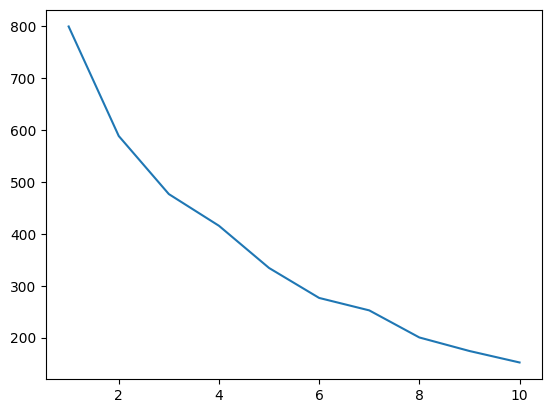

In [92]:
inertia_score2 = []
for i in range(1,11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(dff)
    inertia_score2.append(kmeans2.inertia_)
inertia_score2
plt.plot(range(1,11),inertia_score2);

In [93]:
clustering3 = KMeans(n_clusters=6)

In [94]:
clustering3.fit(dff)
clustering3.labels_

array([0, 0, 5, 5, 5, 5, 1, 5, 2, 5, 2, 5, 1, 5, 2, 0, 5, 0, 2, 5, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 5, 2, 5, 2, 0, 1, 5, 1, 5, 1, 5, 1, 0, 2, 5,
       1, 5, 1, 5, 5, 5, 1, 0, 5, 2, 1, 2, 1, 2, 5, 2, 2, 0, 1, 1, 2, 0,
       1, 1, 0, 5, 2, 1, 1, 1, 2, 0, 1, 2, 5, 1, 2, 0, 2, 1, 5, 2, 1, 5,
       5, 1, 1, 0, 2, 1, 5, 0, 1, 5, 2, 0, 5, 1, 2, 0, 2, 5, 1, 2, 2, 2,
       2, 5, 1, 0, 5, 5, 1, 1, 1, 1, 0, 1, 1, 3, 5, 3, 4, 3, 2, 3, 4, 3,
       5, 3, 4, 3, 1, 3, 4, 3, 1, 3, 5, 3, 4, 3, 4, 3, 1, 3, 4, 3, 1, 3,
       1, 3, 4, 3, 4, 3, 1, 3, 4, 3, 4, 3, 4, 3, 1, 3, 4, 3, 4, 3, 1, 3,
       4, 3, 4, 3, 1, 3, 4, 3, 1, 3, 1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3], dtype=int32)

In [95]:
dff["Multivariate-Cluster"] = clustering3.labels_
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Multivariate-Cluster
0,-1.424569,-1.738999,-0.434801,1.128152,0
1,-1.281035,-1.738999,1.195704,1.128152,0
2,-1.352802,-1.700830,-1.715913,-0.886405,5
3,-1.137502,-1.700830,1.040418,-0.886405,5
4,-0.563369,-1.662660,-0.395980,-0.886405,5


In [96]:
dff["Multivariate-Cluster"].value_counts(normalize=True)*100

Multivariate-Cluster
1    25.0
3    19.5
5    18.5
2    14.0
0    11.5
4    11.5
Name: proportion, dtype: float64

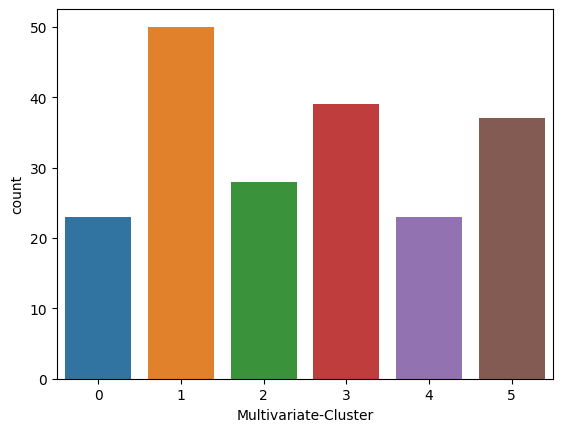

In [97]:
sns.countplot(x=dff["Multivariate-Cluster"],palette="tab10");

<Figure size 900x800 with 0 Axes>

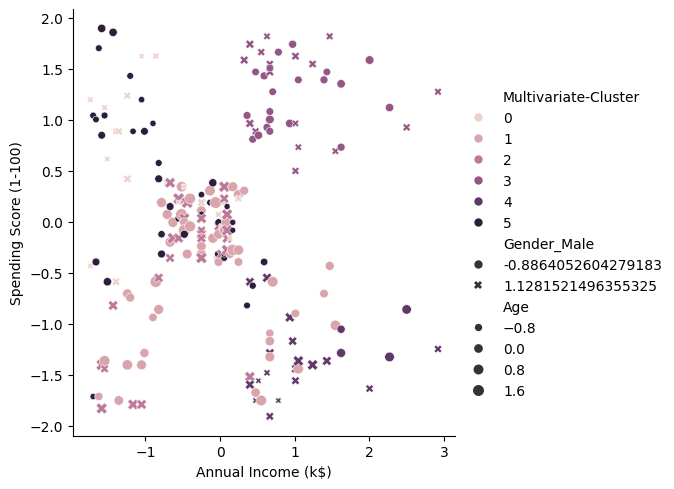

In [98]:
plt.figure(figsize=(9,8))
sns.relplot(data=dff, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Multivariate-Cluster", 
            size="Age", style="Gender_Male");

In [114]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income-Spending Cluster
0,Male,19,15,39,0,4
1,Male,21,15,81,0,3
2,Female,20,16,6,0,4
3,Female,23,16,77,0,3
4,Female,31,17,40,0,4


In [116]:
data = pd.read_csv("Mall_Customers.csv")

In [118]:
df["CustomerID"] = data["CustomerID"]
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income-Spending Cluster,CustomerID
0,Male,19,15,39,0,4,1
1,Male,21,15,81,0,3,2
2,Female,20,16,6,0,4,3
3,Female,23,16,77,0,3,4
4,Female,31,17,40,0,4,5


In [3]:
df.to_csv("Clustrering.csv")

NameError: name 'df' is not defined

# END 